Análisis de datos usando Pandas
===

* *60 min* | Última modificación: Junio 22, 2019.

En este tutorial se presenta el análisis de una base de datos sobre vuelos usando Pndas. En este documento se ejemplifica el uso de DataFrames para la realización de consultas usando sus funciones nativas.

Este ejemplo está basado en el tutorial de Spark de HortoWorks, disponible en https://es.hortonworks.com/tutorial/learning-spark-sql-with-zeppelin/

## Descripción de los campos del archivo

El archivo usado contiene la información sobre vuelos entre 1987 y 2008, y cuenta con los siguientes campos:

* Year: 1987-2008

* Month: 1-12

* DayofMonth: 1-31

* DayOfWeek: 1 (Monday) - 7 (Sunday)

* DepTime: actual departure time (local, hhmm)

* CRSDepTime: scheduled departure time (local, hhmm)

* ArrTime: actual arrival time (local, hhmm)

* CRSArrTime: scheduled arrival time (local, hhmm)

* UniqueCarrier: unique carrier code

* FlightNum: flight number

* TailNum: plane tail number

* ActualElapsedTime: in minutes

* CRSElapsedTime: in minutes

* AirTime: in minutes

* ArrDelay: arrival delay, in minutes

* DepDelay: departure delay, in minutes

* Origin: origin IATA airport code

* Dest: destination IATA airport code

* Distance: in miles

* TaxiIn: taxi in time, in minutes

* TaxiOut: taxi out time in minutes

* Cancelled: was the flight cancelled?

* CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

* Diverted: 1 = yes, 0 = no

* CarrierDelay: in minutes

* WeatherDelay: in minutes

* NASDelay: in minutes

* SecurityDelay: in minutes

* LateAircraftDelay: in minutes

## Preparación

In [1]:
## importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)

## Carga de datos en Pandas

In [2]:
##
## Crea un DataFrame a partir del archivo fligths.csv
##
flights = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/flights.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

In [4]:
##
## Se imprime el esquema para verificar la lectura
## del archivo.
##
flights.describe()

           Year     Month     DayofMonth      DayOfWeek       DepTime  \
count  100000.0  100000.0  100000.000000  100000.000000  98858.000000   
mean     2008.0       1.0      17.087860       3.890040   1355.200722   
std         0.0       0.0       8.356364       1.952999    464.089632   
min      2008.0       1.0       1.000000       1.000000      1.000000   
25%      2008.0       1.0      10.000000       2.000000    942.000000   
50%      2008.0       1.0      17.000000       4.000000   1344.000000   
75%      2008.0       1.0      24.000000       5.000000   1743.000000   
max      2008.0       1.0      31.000000       7.000000   2359.000000   

          CRSDepTime       ArrTime     CRSArrTime      FlightNum  \
count  100000.000000  98698.000000  100000.000000  100000.000000   
mean     1341.989400   1492.739225    1502.601540    1510.648540   
std       451.356984    496.376794     478.100216    1186.128598   
min       600.000000      1.000000       5.000000       1.000000   
25

In [5]:
## 
## Se imprime un subconjunto de las columnas para verificar
## la lectura
##
flights[['UniqueCarrier', 'FlightNum', 'DepDelay', 'ArrDelay', 'Distance']].head(5)

  UniqueCarrier  FlightNum  DepDelay  ArrDelay  Distance
0            WN        335       8.0     -14.0       810
1            WN       3231      19.0       2.0       810
2            WN        448       8.0      14.0       515
3            WN       1746      -4.0      -6.0       515
4            WN       3920      34.0      34.0       515

In [6]:
##
## Número total de registros leidos
##
numTotalFlights = len(flights)
numTotalFlights

100000

## Cálculos usando funciones de los DataFrames

### Cómputo del porcentaje de vuelos retrasados

In [7]:
##
## La variable delayedFlights contiene las columnas UniqueCarrier y DepDelay 
## para los vuelos con DepDelay > 15 minutos.
##
delayedFlights = flights[flights['DepDelay'] > 15][['UniqueCarrier', 'DepDelay']]
delayedFlights.head(5)

   UniqueCarrier  DepDelay
1             WN      19.0
4             WN      34.0
5             WN      25.0
6             WN      67.0
11            WN      94.0

In [8]:
##
## Porcentaje de vuelos retrasados.
##
numDelayedFlights = len(delayedFlights)
print("Porcentaje de vuelos retrasados: " + str(numDelayedFlights / numTotalFlights * 100) + "%")

Porcentaje de vuelos retrasados: 19.587%


### Creación de variables usando funciones de usuario

A continuación se desea crear una nueva columna llamada `IsDelayed` que vale 0 si el vuelo se realizó a tiempo y 1 si se retraso.

In [9]:
flightsWithDelays = flights[['Year',
                             'Month', 
                             'DayofMonth', 
                             'UniqueCarrier', 
                             'FlightNum', 
                             'DepDelay']].copy()

flightsWithDelays['IsDelayed'] =  flightsWithDelays['DepDelay'].copy()
flightsWithDelays['IsDelayed'] = flightsWithDelays['IsDelayed'].map(lambda x: 1 if x > 15 else 0)
flightsWithDelays['IsDelayed'] = flightsWithDelays['IsDelayed'].map(lambda x: 0 if np.isnan(x) else x)

flightsWithDelays[['DepDelay', 'IsDelayed']].head(10)

   DepDelay  IsDelayed
0       8.0          0
1      19.0          1
2       8.0          0
3      -4.0          0
4      34.0          1
5      25.0          1
6      67.0          1
7      -1.0          0
8       2.0          0
9       0.0          0

In [10]:
## 
## A continuación, se calcula el porcentaje de vuelos con retrasos
##
flightsWithDelays.IsDelayed.sum() / flightsWithDelays.DepDelay.count()

0.19813267515021546

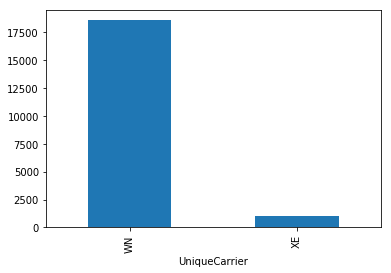

In [12]:
##
## Retrasos por transportador
##
%matplotlib inline
flights['IsDelayed'] = flights['DepDelay'].copy()
flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 1 if x > 15 else 0)
flights['IsDelayed'] = flights['IsDelayed'].map(lambda x: 0 if np.isnan(x) else x)
(flights.groupby('UniqueCarrier').sum())["IsDelayed"].plot.bar();

### Retrasos por día de la semana

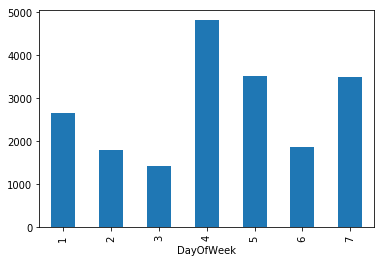

In [13]:
##
## Compute los retrasos por dia de la semana
##
(flights.groupby('DayOfWeek').sum())["IsDelayed"].plot.bar();

### Retrasos por hora del día

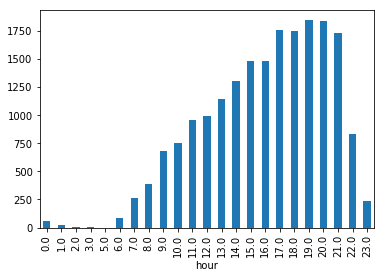

In [23]:
##
## Compute los retrasos por hora del dia
##
flights['hour'] = flights['DepTime'].copy()
flights['hour'] = flights['hour'].map(lambda x: int(x/100) if not np.isnan(x) else x)
(flights.groupby('hour').sum())["IsDelayed"].plot.bar();